# Berkeley Data Analytics Bookcamp – Project 1

## Cryptocurrency

### An Eagle's Eye View – David

### Top 10s – Josefina

In [284]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
from config import api_key
from datetime import datetime

In [285]:
#Looked for the information in Crypto Compare. Build the url for both requests. 
urlmktcap=f"https://min-api.cryptocompare.com/data/top/mktcapfull?limit=10&tsym=USD&api_key={api_key}"
urlvolume="https://min-api.cryptocompare.com/data/top/totalvolfull?limit=10&tsym=USD&api_key={api_key}"

In [286]:
#For the first analysis: get the information with json format, and isolates data items for easy reading
responsemktcap=requests.get(urlmktcap).json()
datamktcap=responsemktcap["Data"]

In [287]:
#Obtain the names of the top 10 main currencies considering Market Capitalization. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_mktcap_list=[]
price_mktcap_list=[]
mktcap_list=[]
for index in indexes:
    name=datamktcap[index]["CoinInfo"]["FullName"]
    price=datamktcap[index]["RAW"]["USD"]["PRICE"]
    mktcap=datamktcap[index]["RAW"]["USD"]['MKTCAP']
    name_mktcap_list.append(name)
    price_mktcap_list.append(price)
    mktcap_list.append(mktcap)

In [288]:
#Create a DataFrame with the information obtained.
mktcap_df1=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})

In [289]:
#Format the columns and present the data.
mktcap_df1["Price"] = mktcap_df1["Price"].map("${:,.2f}".format)
mktcap_df1["Market Capitalization"] = mktcap_df1["Market Capitalization"].map("${:,.2f}".format)
mktcap_df1

,Cryptocurrency,Price,Market Capitalization
0,Bitcoin,"$23,167.34","$446,621,416,895.08"
1,Ethereum,"$1,597.04","$195,435,959,304.48"
2,Tether,$1.00,"$67,811,335,333.20"
3,Binance Coin,$313.69,"$51,218,354,171.68"
4,USD Coin,$1.00,"$42,429,524,018.19"
5,XRP,$0.41,"$41,035,543,135.21"
6,Aptos,$17.15,"$17,451,550,139.98"
7,BUSD,$1.00,"$15,919,899,097.04"
8,Cardano,$0.39,"$13,323,829,210.54"
9,Dogecoin,$0.10,"$13,477,927,632.69"


<function matplotlib.pyplot.show(close=None, block=None)>

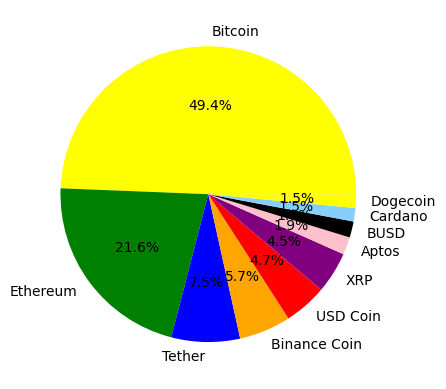

In [290]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's market capitalization.
mktcap_df=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(mktcap_df["Market Capitalization"], labels=mktcap_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")
# Save an image of the chart and print the final product to the screen
plt.savefig("Images/PieMktCap.png")
plt.show

In [291]:
#For the second analysis: get the information with json format, and isolates data items for easy reading
responsevolume=requests.get(urlvolume).json()
datavolume=responsevolume["Data"]

In [292]:
#Obtain the names of the top 10 main currencies considering 24-hour trading volume. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_volume_list=[]
price_volume_list=[]
volume_list=[]
for index in indexes:
    name_v=datavolume[index]["CoinInfo"]["FullName"]
    price_v=datavolume[index]["RAW"]["USD"]["PRICE"]
    volume=datavolume[index]["RAW"]["USD"]['VOLUME24HOUR']
    name_volume_list.append(name_v)
    price_volume_list.append(price_v)
    volume_list.append(volume)

In [293]:
#Create a DataFrame with the information
volume_df1=pd.DataFrame({
    "Cryptocurrency":name_volume_list,
    "Price":price_volume_list,
    "Volume":volume_list
})

In [294]:
#Format the columns
volume_df1["Price"] = volume_df1["Price"].map("${:,.2f}".format)
volume_df1["Volume"] = volume_df1["Volume"].map("{:,.2f}".format)
volume_df1

,Cryptocurrency,Price,Volume
0,Bitcoin,"$23,166.82","50,722.65"
1,Ethereum,"$1,597.01","422,023.36"
2,BUSD,$1.00,"800,371.27"
3,Dogecoin,$0.10,"1,324,354,743.57"
4,XRP,$0.41,"149,256,674.33"
5,Tether,$1.00,"251,500,955.06"
6,Litecoin,$94.74,"647,709.58"
7,Aptos,$17.15,"487,695.40"
8,Mask Network,$4.33,"2,777,456.44"
9,Highstreet,$3.43,"3,602,065.16"


<function matplotlib.pyplot.show(close=None, block=None)>

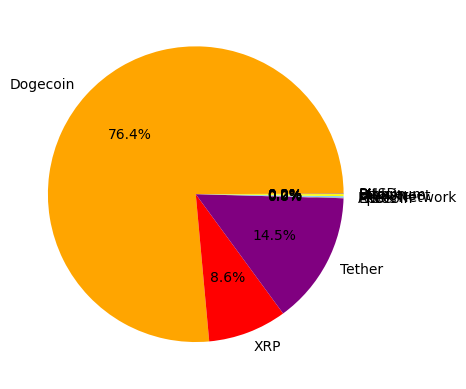

In [295]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's volumen trade in the past 24 hours.
volume_df=pd.DataFrame({
    "Cryptocurrency":name_volume_list,
    "Price":price_volume_list,
    "Volume":volume_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(volume_df["Volume"], labels=volume_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")

# Save an image of the chart and print the final product to the screen
plt.savefig("Images/Pievolume.png")
plt.show

In [296]:
#Historical information for Doge coin
urldoge="https://min-api.cryptocompare.com/data/v2/histoday?fsym=DOGE&tsym=USD&limit=30"
#For the third analysis: get the information with json format, and isolates data items for easy reading
responsedoge=requests.get(urldoge).json()
datadoge=responsedoge["Data"]["Data"]

In [297]:
#Obtain the volume trade for the last 30 days. Create a list for the time and volume. 
indexes=range(0,30)
doge_time_list=[]
doge_volumeto_list=[]
doge_volumefrom_list=[]
for index in indexes:
    doge_time=datetime.fromtimestamp(datadoge[index]["time"])
    doge_volumeto=datadoge[index]["volumeto"]
    doge_volumefrom=datadoge[index]["volumefrom"]
    doge_time_list.append(doge_time)
    doge_volumeto_list.append(doge_volumeto)
    doge_volumefrom_list.append(doge_volumefrom)

In [298]:
#Create a DataFrame with the information
doge_df1=pd.DataFrame({
    "Time":doge_time_list,
    "Volume To":doge_volumeto_list,
    "Volume From":doge_volumefrom_list
})

In [299]:
#Format the columns
doge_df1["Time"] = pd.to_datetime(doge_df1["Time"],format=("MM-DD-YYYY"))
#doge_df1["Volume To"] = doge_df1["Volume To"].map("{:,.2f}".format)
#doge_df1["Volume From"] = doge_df1["Volume From"].map("{:,.2f}".format)
doge_df1

,Time,Volume To,Volume From
0,2022-12-31 16:00:00,2.388554e+07,3.428378e+08
1,2023-01-01 16:00:00,3.571000e+07,4.993296e+08
2,2023-01-02 16:00:00,2.603179e+07,3.672856e+08
3,2023-01-03 16:00:00,3.552043e+07,4.927642e+08
4,2023-01-04 16:00:00,4.168906e+07,5.707064e+08
5,2023-01-05 16:00:00,2.954362e+07,4.147921e+08
6,2023-01-06 16:00:00,1.144361e+07,1.583526e+08
7,2023-01-07 16:00:00,2.167873e+07,2.998009e+08
8,2023-01-08 16:00:00,7.838382e+07,1.022957e+09
9,2023-01-09 16:00:00,4.697561e+07,6.152793e+08


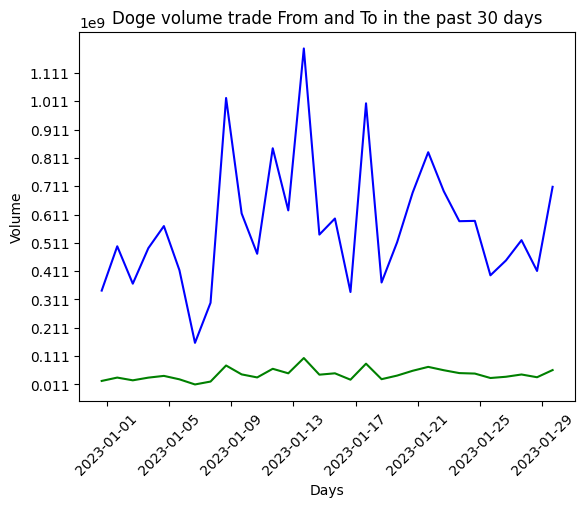

In [304]:
plt.plot(doge_df1["Time"],doge_df1["Volume To"],color="green", label="Volume to")
plt.plot(doge_df1["Time"],doge_df1["Volume From"],color="blue", label="Volume from")

plt.title("Doge volume trade From and To in the past 30 days")
plt.xlabel("Days")
plt.ylabel("Volume")
plt.xticks(rotation =45)
plt.locator_params(axis='y', nbins=50)
plt.yticks(np.arange(min(doge_df1["Volume To"]), max(doge_df1["Volume From"])+100, 100000000))
plt.show()

### Narrowing in on Bitcoin and Ethereum – Tristian